# Численные методы: ЛР №1, вариант 3
##### *Выполнил студент: Денис Кирбаба*

### Метод дихотомии
#### *Описание метода*
Есть функция $f(x)$ заданная на отрезке $[a_0,b_0]$.   
Мы хотим найти минимум с точностью $ε$  
В чем заключается метод: выбираем середину отрезка $[a_0,b_0 ]:\dfrac{a_0+b_0}{2}$ . Задаём некоторую $δ$ – величина отступа, причём $δ<ε/2$  
Точки $x_1$ и $x_2$ выбираем следующим образом: отступаем от найденной середины на расстояние $δ$, то есть $x_1=\dfrac{a_i+b_i}{2}-δ,x_2=\dfrac{a_i+b_i}{2}+δ$. Далее вычисляем значения в точках $x_1$ и $x_2$ и сокращаем исследуемый отрезок.  
То есть если $f(x_1)<f(x_2)$, то далее работаем с отрезком $[a_i, f(x_2)]$,  
если $f(x_1)>f(x_2)$, то далее работаем с отрезком $[f(x_2), b_i]$,  
а если $f(x_1)=f(x_2)$, то далее работаем с отрезком $[f(x_1), f(x_2)]$  
И так продолжаем сокращать отрезок до тех пор, пока его величина не станет меньше $ε$  
В результате, за одну итерацию уменьшение интервала неопределённости происходит примерно в 2 раза $[a_1,b_1 ]≅\dfrac{[a_0,b_0 ]}{2}$  
Таким образом, за n итераций длина интервала неопределённости будет равна: $[a_n,b_n ]≅\dfrac{[a_0,b_0 ]}{2^n}$   
Соответственно, если мы хотим получить точность $ε$ то нам необходимо совершить примерно $\dfrac{ln⁡(\dfrac{(a_0-b_0)}{ε})}{ln2}$ итераций  
При этом на каждой итерации мы дважды вычисляем значение функции в точке  
#### *Реализация метода*

In [651]:
def dichotomy(leftBorder: float, rightBorder: float, accuracy: float, function: ()):

    # variables storing the number of iterations and calculations of the function, respectively
    iterations = 0
    calculations = 0

    # coefficient reflects how large the indents from the midpoint will be (from 0 (coeff = 0) to accuracy / 2 (coeff = 1))
    indentCoeff = 0.7

    # indent from the midpoint
    delta = (accuracy / 2) * indentCoeff

    # array of segment lengths
    uncertainlySegmentLength = [rightBorder - leftBorder]

    # reduce the segment until we reach the specified accuracy
    while abs(rightBorder - leftBorder) > accuracy:

        x1 = (leftBorder + rightBorder) / 2 - delta
        x2 = (leftBorder + rightBorder) / 2 + delta

        # change the boundaries of the segment of uncertainty
        if function(x1) > function(x2):
            leftBorder = x1
        elif function(x1) < function(x2):
            rightBorder = x2
        else:
            leftBorder = x1
            rightBorder = x2

        iterations += 1
        calculations += 2

        uncertainlySegmentLength.append(rightBorder - leftBorder)

    return ["Dichotomy", (leftBorder + rightBorder) / 2, function((leftBorder + rightBorder) / 2), iterations, calculations + 1, uncertainlySegmentLength]
    
    """
    print("__Dichotomy method__")
    print(f"X coordinate of the found minimum point: {(leftBorder + rightBorder) / 2}")
    print(f"Y coordinate of the found minimum point: {function((leftBorder + rightBorder) / 2)}")
    print(f"Number of iterations: {iterations}")
    print(f"Number of fuction calculations: {calculations + 1}")
    print(f"Сhange in uncertainty interval: {uncertainlySegmentLength}")
    """

### Метод золотого сечения
#### *Описание метода*
Золотое сечение – это такое деление отрезка, при котором отношение меньшей части к большей такое же как отношение большей части ко всей длине отрезка 
<p align="center">
  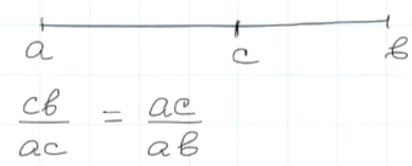
</p>

Пусть точки $x_1,x_2$  в самом начале находятся симметрично относительно середины отрезка и эти точки будут делить этот отрезок в пропорции золотого сечения  
Например, для точки $x_1: \dfrac{(x_1-a_0)}{(b_0-x_1 )}=\dfrac{(b_0-x_1)}{(b_0-a_0 )}$  
С помощью математических преобразований можно найти координаты точек: $x_1=a_i+\dfrac{(3-√5)}{2}(b_i-a_i)$ и $x_2=a_i+\dfrac{(-1+√5)}{2}(b_i-a_i)$  
Интервал неопределенности будет уменьшаться примерно в $\dfrac{(3-√5)}{2}≈0.382$, это не так быстро, как в методе дихотомии (там уменьшалось почти в 2 раза), но огромным плюсом является то, что значение функции мы вычисляем только 1 раз при каждой итерации  
#### *Реализация метода*

In [652]:
from math import sqrt

def goldenRatio(leftBorder: float, rightBorder: float, accuracy: float, function: ()):

	# golden ratio coefficients
	phi1 = (3 - sqrt(5)) / 2
	phi2 = (-1 + sqrt(5)) / 2

	x1 = leftBorder + (rightBorder - leftBorder) * phi1
	x2 = leftBorder + (rightBorder - leftBorder) * phi2

	fx1 = function(x1)
	fx2 = function(x2)

	# variables storing the number of iterations and calculations of the function, respectively
	iterations = 0
	calculations = 2

	# array of segment lengths
	uncertainlySegmentLength = [rightBorder - leftBorder]

	# reduce the segment until we reach the specified accuracy
	while abs(rightBorder - leftBorder) > accuracy:

		# change the boundaries of the segment of uncertainty
		if fx1 < fx2:
			rightBorder = x2
			x2 = x1
			fx2 = fx1
			x1 = leftBorder + (rightBorder - leftBorder) * phi1
			fx1 = function(x1)
		elif fx1 > fx2:
			leftBorder = x1
			x1 = x2
			fx1 = fx2
			x2 = leftBorder + (rightBorder - leftBorder) * phi2
			fx2 = function(x2)
		else:
			leftBorder = x1
			rightBorder = x2
			x1 = leftBorder + (rightBorder - leftBorder) * phi1
			x2 = leftBorder + (rightBorder - leftBorder) * phi2
			fx2 = function(x2)
			fx1 = function(x1)
			calculations += 1

		iterations += 1
		calculations += 1

		uncertainlySegmentLength.append(rightBorder - leftBorder)
	
	return ["Golden ratio", (leftBorder + rightBorder) / 2, function((leftBorder + rightBorder) / 2), iterations, calculations + 1, uncertainlySegmentLength]

	"""
	print("__Golden ratio method__")
	print(f"X coordinate of the found minimum point: {(leftBorder + rightBorder) / 2}")
	print(f"Y coordinate of the found minimum point: {function((leftBorder + rightBorder) / 2)}")
	print(f"Number of iterations: {iterations}")
	print(f"Number of fuction calculations: {calculations + 1}")
	print(f"Сhange in uncertainty interval: {uncertainlySegmentLength}")
	"""

### Метод Фибоначчи
#### *Описание метода*
Данный метод – улучшение метода золотого сечения, служащего для нахождения минимума или максимума функции. Тут тоже на 1 итерации требуется вычислить значение функции дважды, а на всех последующих только 1 раз. Отличается он тем, что коэффициент сокращения интервала неопределенности будет меняться от итерации к итерации  
Стратегия выбора точки следующая: нужно помещать следующую точку внутрь интервала симметрично уже находящейся там точке - это позволит минимизировать интервал неопределенности при конечном количестве вычислений функции. Так делаем до тех пор, пока у нас осталается возможность вычислять функцию в точке ($i<=n$)  
Как выбрать исходную (первую) точку?  
<p align="center">
  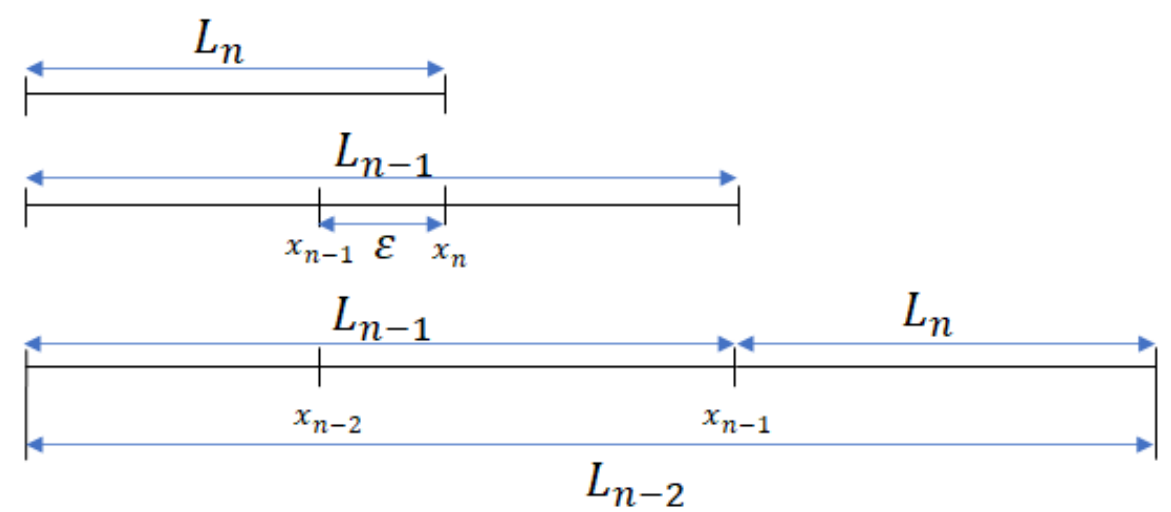  
<p>
Допустим мы уже на $n$-ом вычислении, тогда для того чтобы наиболее уменьшить интервал неопределенности на данном этапе нужно разделить пополам предыдущий интервал.</p>
<p>Обозначив за *ε* минимальную длину интервала неопределенности, запишем систему равенств:</p>

>$L_{n-1}=2L_n-ε$  
>$L_{n-2}=L_{n-1}+L_n$  
>$L_{n-3}=L_{n-2}+L_{n-1}$  
>$L_{n-4}=L_{n-3}+L_{n-2}$  
>$...$  
>$L_1$  

Перепишем систему, чтобы справа были только $L_n$ и $ε$:  

>$L_{n-1}=2L_n-ε$  
>$L_{n-2}=3L_n-ε$  
>$L_{n-3}=5L_n-2ε$  
>$L_{n-4}=8L_n-3ε$  
>$...$  
>$L_1$  

Вспомним про числа Фибоначчи:  

>$F_n=F_{n-1}+F_{n-2}$  
>$F_0=F_1=1$  
>$F_n=\dfrac{1}{\sqrt{5}}(\dfrac{1+\sqrt{5}}{2}^n-\dfrac{1-\sqrt{5}}{2}^n)$,  $n=1,2,3...$  

Тогда точки $x_1, x_2$ вычисляются так:  

>$x_1=a_0+\dfrac{F_n}{F_{n+2}}(b_0-a_0)$  
>$x_2=a_0+\dfrac{F_{n+1}}{F_{n+2}}(b_0-a_0)$  

Число $n$ будет выбираться исходя их точности и начальной длины интервала или количества вычислений функции  
Значит на $k$-ом шаге у нас будет тройка чисел $a_k, b_k, x_k$, где  
$\Delta_k=b_k-a_k=(b_0-a_0)\dfrac{F_{n-k+3}}{F_{n+2}}, 1<=k<=n$, $a_1=a_0, b_1=b_0$  
Тогда точка $x_k$ с вычисленным значением $f(x_k)= \min_{1>=i>=k} f(x_i)$ совпадает с одной из точек $x_1, x_2$ расположенных на отрезке $[a_k,b_k]$ симметрично относительно его середины  
При $k=n$ процесс заканчивается, в этом случае $\Delta_n=b_n-a_n=(b_0-a_0)\dfrac{b_0-a_0}{F_{n+2}}$, а точки $x_1, x_2$ совпадают и делят отрезок пополам  
Значит $\dfrac{b_n-a_n}{2}=\dfrac{b_0-a_0}{F_{n+2}}<ϵ$  
Можно выбрать $n$ из условия $\dfrac{b_0-a_0}{ϵ}<F_{n+2}$  
Также плюсом метода Фибоначчи является то, что в нем не нужно вычислять значения функции в крайних точках начального интервала. Это удобно, если оптимизирующая функция имеет вертикальную асимптоту  
#### *Реализация метода*

In [653]:
def fibonacci(leftBorder: float, rightBorder: float, accuracy: float, function: ()):

	# array of segment lengths
	uncertainlySegmentLength = [rightBorder - leftBorder]

	# fill array of fibonacci values
	# the number of values needed to achieve the specified accuracy
	fibonacci = [1, 1]
	index = 1
	while (rightBorder - leftBorder) / accuracy > fibonacci[index]:
		index += 1
		fibonacci.append(fibonacci[index - 1] + fibonacci[index - 2])

	# number of iterations
	iterations = len(fibonacci) - 1

	# calculate first two dots
	x1 = leftBorder + (rightBorder - leftBorder) * (fibonacci[iterations - 2]/ fibonacci[iterations])
	x2 = leftBorder + (rightBorder - leftBorder) * (fibonacci[iterations - 1]/ fibonacci[iterations])
	fx1 = function(x1)
	fx2 = function(x2)

	# number of function calculations
	calculations = 2

	for k in range(1, iterations):
		
		if fx1 > fx2:
			leftBorder = x1
			x1 = x2
			fx1 = fx2

			x2 = leftBorder + (fibonacci[iterations - k - 1] / fibonacci[iterations - k]) * (rightBorder - leftBorder)
			fx2 = function(x2)

		else:
			rightBorder = x2
			x2 = x1
			fx2 = fx1

			x1 = leftBorder + (fibonacci[iterations - k - 2] / fibonacci[iterations - k]) * (rightBorder - leftBorder)
			fx1 = function(x1)

		calculations += 1
		uncertainlySegmentLength.append(rightBorder - leftBorder)
	
	return ["Fibonacci", (leftBorder + rightBorder) / 2, function((leftBorder + rightBorder) / 2), iterations, calculations + 1, uncertainlySegmentLength]

	"""
	print("__Fibonacci method__")
	print(f"X coordinate of the found minimum point: {(leftBorder + rightBorder) / 2}")
	print(f"Y coordinate of the found minimum point: {function((leftBorder + rightBorder) / 2)}")
	print(f"Number of iterations: {iterations}")
	print(f"Number of function calculations: {calculations + 1}")
	print(f"Сhange in uncertainty interval: {uncertainlySegmentLength}")
	"""

### Метод парабол
#### *Описание метода*
В данном методе предполагается аппроксимизировать оптимизиремую функцию $f(x)$ с помощью квадратичной функции $p(x)=ax^2+bx+c$  
Пусть у нас имеется 3 точки: границы отрезка и внутренняя точка: $x_1<x_2<x_3$, причем $x_{min} \in [x_1,x_3]$  
Тогда, для того, чтобы найти коэффициенты аппроксимирующей параболы $a,b,c$ необходимо решить систему линейных уравнений  
$a{x_i}^2+bx_i+c=f_i(x)=f(x_i), i=1,2,3$  
Решив систему найдем:  
$u=-\dfrac{b}{2a}=x_2-\dfrac{(x_2-x_1)^2(f_2-f_3)-(x_2-x_3)^2(f_3-f_1)}{2[(x_2-x_1)(f_2-f_3)-(x_2-x_3)(f_2-f_1)]}$  
Если $f_2<f_1$ и $f_2<f_3$, то точка $u$ гарантированно попадает в интервал $[x_1,x_3]$  
Таким образом, если внутри отрезка определены 2 точки $x_2, u$, сравнив эти точки можем сократить интервал неопределенности  
Метод парабол обладает "супер-линейной" скоростью сходимости, но такая высокая скорость гарантируется только вблизи точки минимума  
Также следует отметить, что на первой итерации метод требует вычисления значений функции в крайних точках интервала оптимизации
#### *Реализация метода*


In [654]:
def parabola(leftBorder: float, rightBorder: float, accuracy: float, function: ()):

	# calculate inner point
	x = (leftBorder + rightBorder) / 2

	fl = function(leftBorder)
	fx = function(x)
	fr = function(rightBorder)

	# variables storing the number of iterations and calculations of the function, respectively
	iterations = 0
	calculations = 3

	# array of segment lengths
	uncertainlySegmentLength = [rightBorder - leftBorder]

	while True:

		iterations += 1

		u = x - 0.5 * ((x - leftBorder) ** 2 * (fx - fr) - (x - rightBorder) ** 2 * (fx - fl)) / ((x - leftBorder) * (fx - fr) - (x - rightBorder) * (fx - fl))
		fu = function(u)

		calculations += 1

		if abs(u - x) < accuracy:
			if fu > fx:
				xMin = x
				fxMin = fx
				uncertainlySegmentLength.append(abs(u - x))
				break
			else:
				xMin = u
				fxMin = fu
				uncertainlySegmentLength.append(abs(u - x))
				break

		if fu < fx:

			if u >= x:
				leftBorder = x
				fl = fx
				x = u
				fx = fu
			else:
				rightBorder = x
				fr = fx
				x = u
				fx = fu

		elif fu > fx:

			if u >= x:
				rightBorder = u
				fr = fu
			else:
				leftBorder = u
				fl = fu

		else:

			leftBorder = u
			fl = fu
			x = (leftBorder + rightBorder) / 2
			fx = function(x)

			calculations += 1

		uncertainlySegmentLength.append(rightBorder - leftBorder)

	return ["Parabola", xMin, fxMin, iterations, calculations, uncertainlySegmentLength]

	"""
	print("__Parabola method__")
	print(f"X coordinate of the found minimum point: {xMin}")
	print(f"Y coordinate of the found minimum point: {fxMin}")
	print(f"Number of iterations: {iterations}")
	print(f"Number of function calculations: {calculations}")
	print(f"Сhange in uncertainty interval: {uncertainlySegmentLength}")
	"""

### Метод парабол
#### *Описание метода*
Метод золотого сечения представляет собой надежный способ оптимизации, который сходится за гарантированное число итераций, но обладает лишь линейной скоростью сходимости. Метод парабол работает быстрее в малой окрестности оптимального решения, но может работать долго и неустойчиво на начальных стадиях итерационного процесса.  
Поэтому на практике для решения задачи одномерной оптимизции исопльзуется метод Брента, который эффективно комбинирует эти две стратегии.  
В данном методе на каждой итерации отслеживаются значения в шести точках (не обязательно различных): $a,c,x,w,v,u$.  

* точки $a,c$ задают текущий интерал поиска решения  
* $x$ - точка, соответствующая наименьшему значению функции  
* $w$ - точка, соответствующая второму снизу значению функции  
* $v$ - предыдущее значение $w$.  

В отличие от метода парабол, в методе Брента аппроксимизирующая парабола строится с помощью трех наилучших точек $x,w,v$ (в случае если эти три точки различны и значения в них также различны).  
При этом минимум аппроксимизирующей параболы $u$ принимается в качестве следующей точки оптимизиционного процесса, если:
* $u$ попадает внутрь интервала $[a,c]$ и отстоит от границ интервала не менее, чем на $ϵ$  
* $u$ отстоит от точки $x$ не более, чем на половину от длины предпредыдущего шага  

Если точка $u$ отвергается, то следующая точка находится с помощью золотого сечения большего из интервалов $[a,x]$ и $[x,c]$  
  
Приведем некоторые аргументы в пользу обозначенных условий приема минимума параболы $u$. Так как парабола на текущей итерации проводится через точки $x, w, v$, для которых не гарантируются соотношения $v<x<w$ или $w<x<v$, то минимум параболы может оказаться вне интервала $[a,c]$. Условие удаленности точки $u$ от $a$ и $c$ не менее, чем на некоторый порог $ϵ$ позволяет избежать слишком маленьких шагов в оптимизации, которые могут свидетельствовать о локальном застопоривании метода парабол. Аналогично, ограничение на максимальную удаленность $u$ от $x$ позволяет избежать слишком большиз шагов в оптимизации, которые могут соответствовать биениям в методе парабол. Использование в данном ограничении длины предпредыдущего шага, а не предыдущего, является эвристикой, эффективность которой подтверждается в экспериментах на больших базах задач оптимизации. Эта эвристика предлагает не штрафовать метод за текущий не слишком удачный маленький шаг в надежде на успешные шаги метода на следующих итерациях.
#### *Реализация метода*


In [655]:
from math import sqrt

def brent(leftBorder: float, rightBorder: float, accuracy: float, function: ()):

    # golden ratio coefficient
    phi = (3 - sqrt(5)) / 2

    # initial values of our dots
    x = w = v = (leftBorder + rightBorder) / 2
    fx = fw = fv = function(x)

    u = 0

    # variables to store the lengths of the previous and prev-previous steps of the algorithm
    prev = prevprev = rightBorder - leftBorder

    # variables storing the number of iterations and calculations of the function, respectively
    iterations = 0
    calculations = 1

    # array of segment lengths
    uncertainlySegmentLength = []

    while True:

        iterations += 1
        uncertainlySegmentLength.append(rightBorder - leftBorder)

        # at each iteration, we either use the parabola method or the golden section method
        # this variable allows only one of the methods to be executed
        goldenRatioFlag = True

        # if x, w, v are different, then we build an approximating parabola
        if (x != w != v) and (fx != fw != fv):
            u = x - 0.5 * ((x - v) ** 2 * (fx - fw) - (x - w) ** 2 * (fx - fv)) / ((x - v) * (fx - fw) - (x - w) * (fx - fv))
            
            # check if the found minimum is in our segment and far from the boundaries and
            # is no more than half the length of the prev-previous step from the point x
            if abs(u - x) < prevprev / 2 and ((leftBorder + accuracy) <= u <= (rightBorder - accuracy)):
                goldenRatioFlag = False
                prev = abs(u - x)

        # else use the golden ration method
        if goldenRatioFlag:
            if x < (rightBorder + leftBorder) / 2:
                u = x + phi * (rightBorder - x)
                prev = rightBorder - x
            else:
                u = x - phi * (x - leftBorder)
                prev = x - leftBorder

        fu = function(u)
        calculations += 1

        # check for an stop condition
        if rightBorder - leftBorder < accuracy:
            if fu > fx:
                xMin = x
                fxMin = fx
                break
            else:
                xMin = u
                fxMin = fu
                break

        if fu <= fx:

            if u >= x:
                leftBorder = x
            else:
                rightBorder = x

            v = w
            w = x
            x = u
            fv = fw
            fw = fx
            fx = fu

        else:

            if u >= x:
                rightBorder = u
            else:
                leftBorder = u

            if fu <= fw and w == x:
                v = w
                w = u
                fv = fw
                fw = fu
            elif fu <= fv and v == x and v == w:
                v = u
                fv = fu

        # save the prev-previous value
        prevprev = prev

    return ["Brent", xMin, fxMin, iterations, calculations, uncertainlySegmentLength]

    """
    print("__Brent's method__")
    print(f"X coordinate of the found minimum point: {xMin}")
    print(f"Y coordinate of the found minimum point: {fxMin}")
    print(f"Number of iterations: {iterations}")
    print(f"Number of function calculations: {calculations}")
    print(f"Сhange in uncertainty interval: {uncertainlySegmentLength}")
    """

### Задача
#### *Биржевые котировки*  
Одним из наиболее важных показателей для анализа поведения биржи является минимальная цена акции за день. Этот показатель рассчитывается на различных периодах времени наравне с максимальной ценой акции на период, цене на начало и конец рассматриваемого периода, а также объемом продаж. Все вместе эти показатели образуют знакомый многим инструмент – японские свечи.  
Предположим, что аналитик разработал магический алгоритм, предсказывающий поведение акции. Результатом работы алгоритма является участок функции, который отражает движение котировок на период следующей «свечи»:  
<p align="center">
  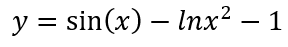
</p>

<p align="center">
  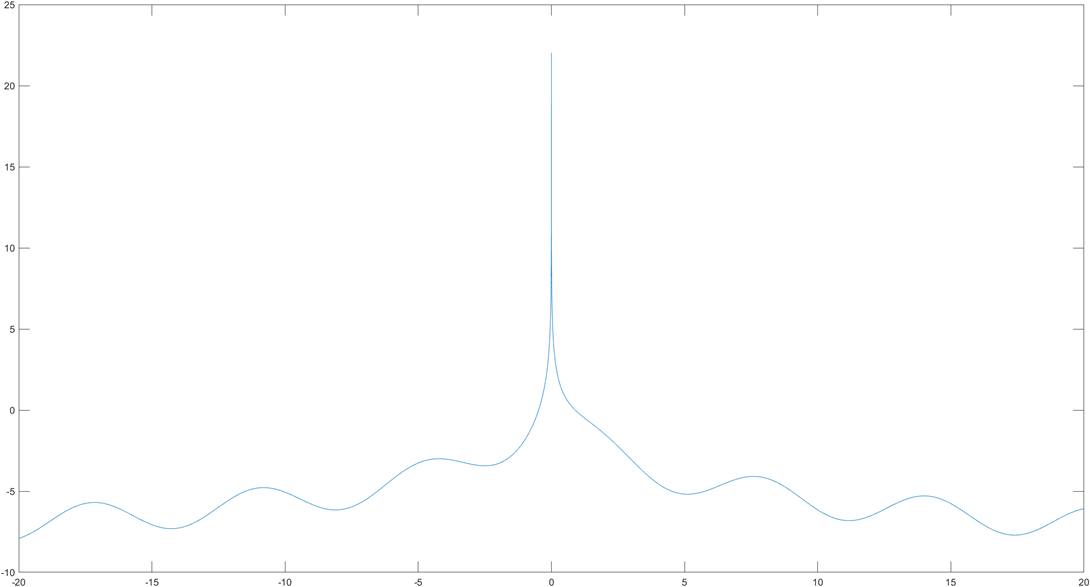
    <h6 align="center"><em>График функции</em></h6>
</p>
По данному предсказанию определите момент времени (в условных единицах), в который вы могли бы совершить покупку акций по минимальной цене.

#### *Реализация функции*

In [656]:
from math import sin, log

def stockFunction(x):
    return sin(x) - log(x ** 2) - 1

Для поиска момента времени покупки буду использовать комбинированный метод Брента  
Буду рассматривать участок $t\in[0.5,7]$ - на данном интервале функция непрерывна и унимодальна  
Значение момента времени буду находить с точностью $ϵ=0.0001$, так как очень на биржевом рынке очень быстро меняется ситуация и важно принимать максимально быстрые решения

In [657]:
# initial conditions
leftBorder = 0.5
rightBorder = 7

accuracy = 0.0001

# finding minimum
result = brent(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = stockFunction)

# output results
print(f"Desired point in time: {result[1]}")
print(f"Minimum share price: {result[2]}")
print(f"Number of iterations: {result[3]}")
print(f"Number of function calculations: {result[4]}")
print(f"Uncertainty intervals: {result[5]}")

Desired point in time: 5.114182172902249
Minimum share price: -5.1843962087149125
Number of iterations: 20
Number of function calculations: 21
Uncertainty intervals: [6.5, 4.491389536562842, 3.25, 2.008610463437158, 1.2413895365628411, 0.767220926874316, 0.47416860968852514, 0.29305231718579083, 0.18111629250273342, 0.17229292687238829, 0.17036259573882262, 0.17026129862338646, 0.06503502894661217, 0.02484217043944703, 0.009489864594725006, 0.00362580556772496, 0.0013859343314468475, 0.0005303796496116675, 0.00020358684038424002, 7.876309453891395e-05]


Момент времени в который можно купить акцию по минимальной цене равен 5.1142

### Сравнение методов на унимодальной функции
Рассмотрим функцию $f(x)=\dfrac{sinx  cosx lnx}{e^2}$  

<p align="center">
  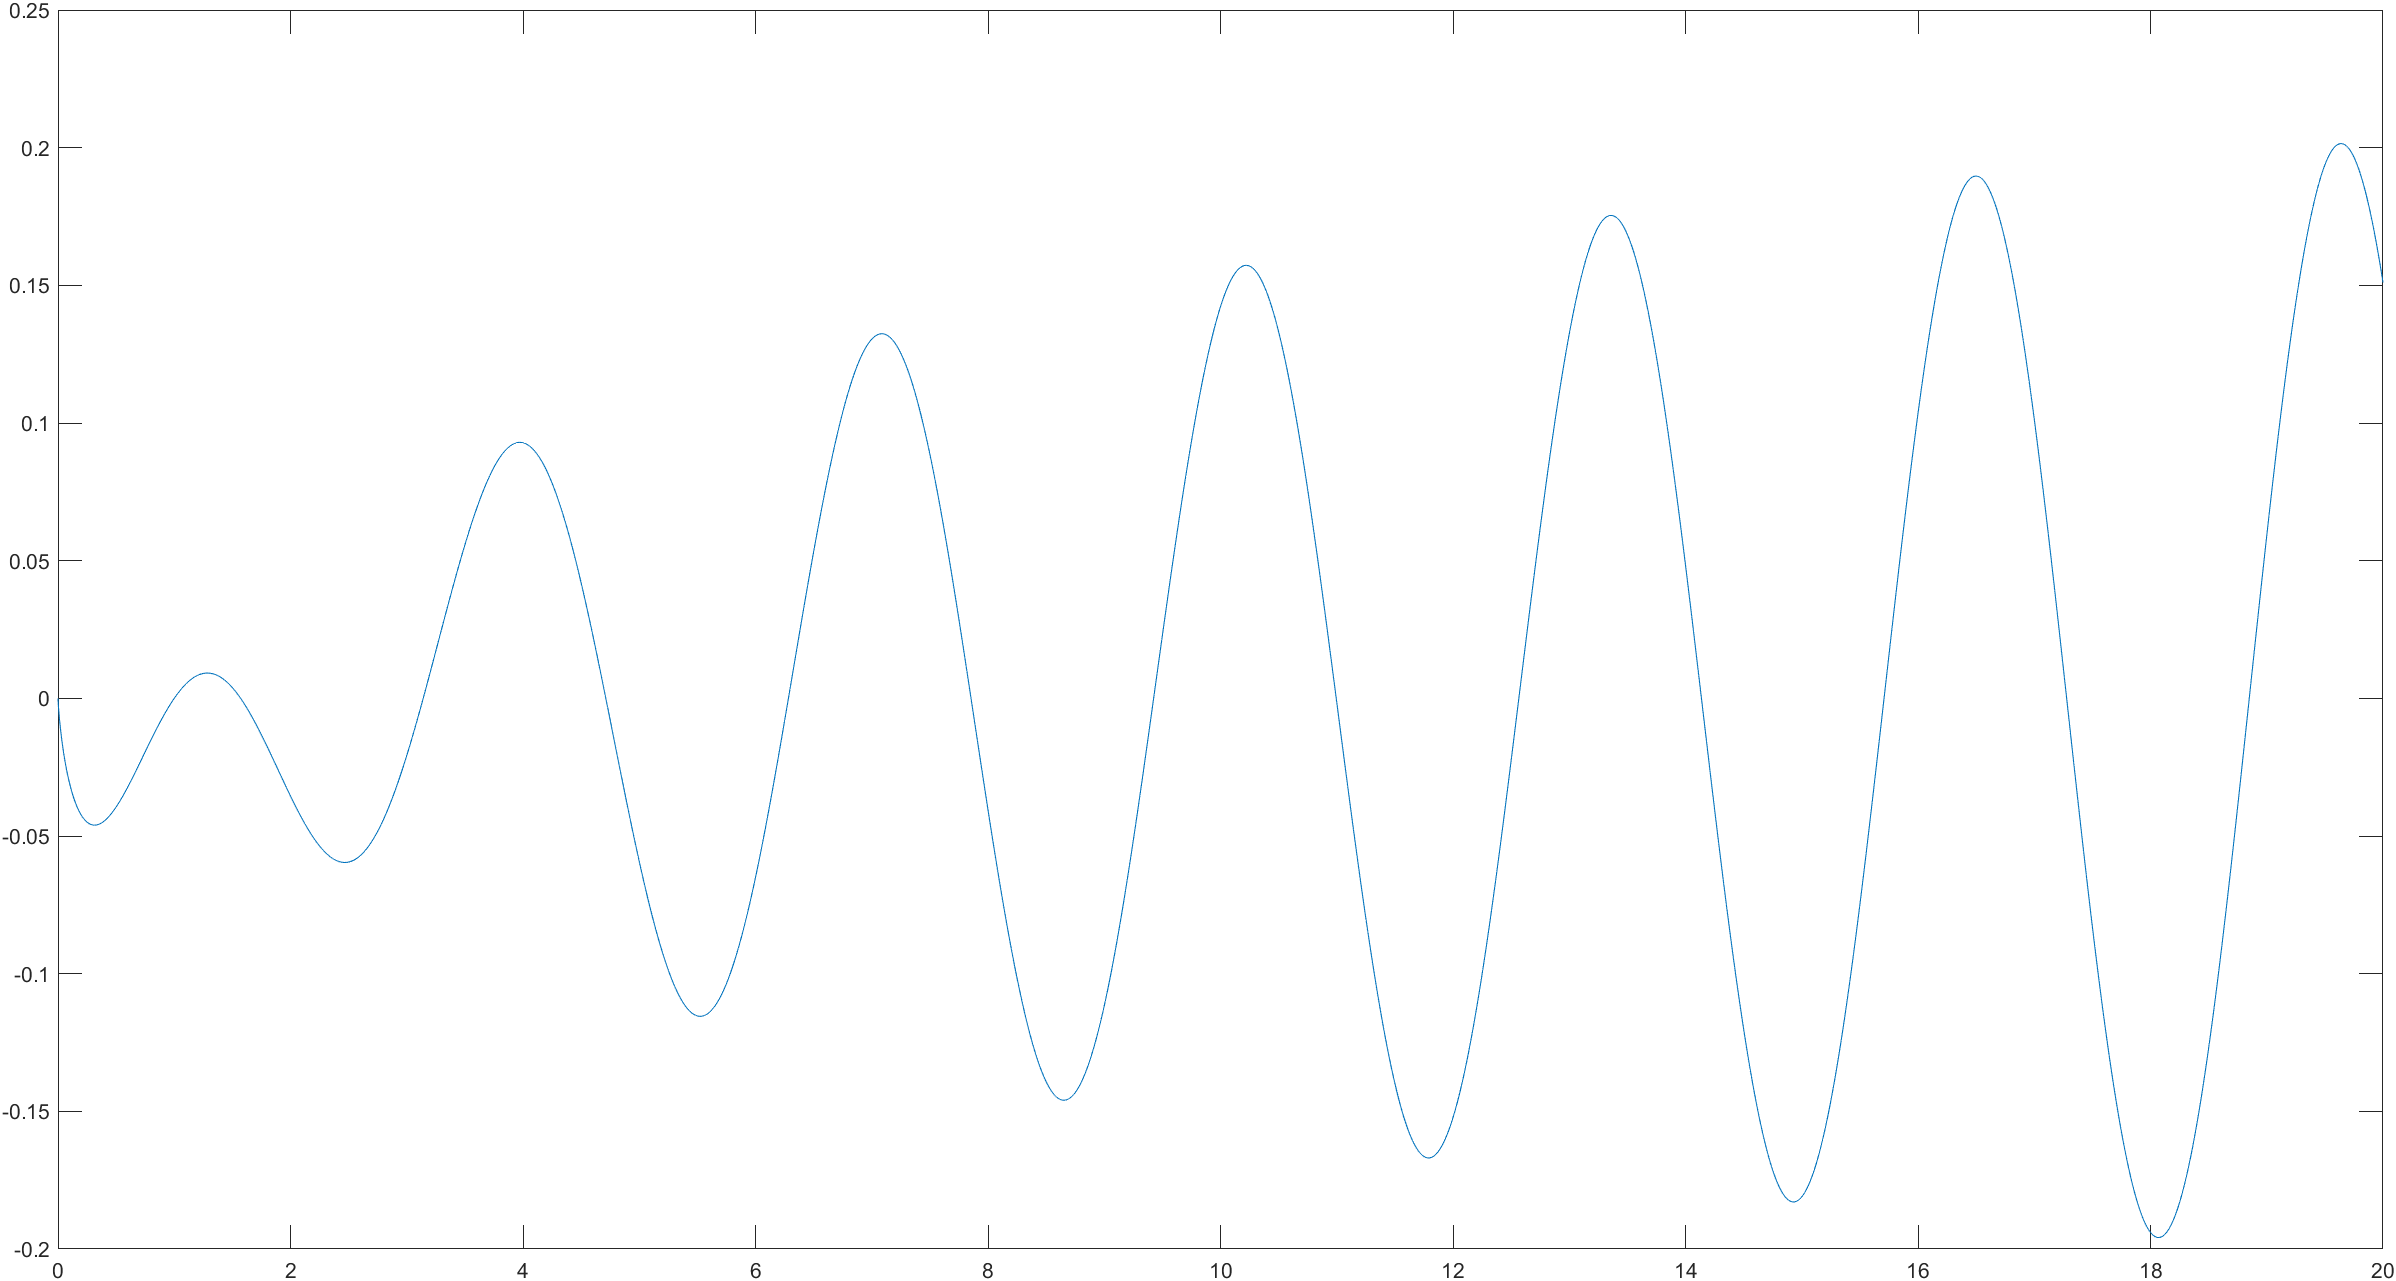
</p>  

Выберем промежуток $x \in [1.4,3.8]$. Так как функция на данном промежутке является непрерывной и унимодальной, то можем использовать вышеописанные оптимизационные методы  
Исследуем методы со следующими значениями точности $ϵ = {0.1, 0.01, 0.001, 0.0001}$

In [658]:
# define our comparative function
from math import sin, cos, log, e

def comparisonFunction(x):
    return sin(x) * cos(x) * log(x) / e ** 2

leftBorder = 1.4
rightBorder = 3.8

accuracy = [0.1, 0.01, 0.001, 0.0001]

# compute minimums
dichotomyRes = []
goldenRatioRes = []
fibonacciRes = []
parabolaRes = []
brentRes = []

for i in accuracy:
    dichotomyRes.append(dichotomy(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = i, function = comparisonFunction))
    goldenRatioRes.append(goldenRatio(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = i, function = comparisonFunction))
    fibonacciRes.append(fibonacci(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = i, function = comparisonFunction))
    parabolaRes.append(parabola(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = i, function = comparisonFunction))
    brentRes.append(brent(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = i, function = comparisonFunction))

Визуализируем данные

In [659]:
from pandas import Series, DataFrame
import pandas as pd

In [660]:
# forming table with x, fx, iterations and calculations

'''
methodsFrame = []
for i in range(3):
    methods = {"name": [dichotomyRes[i][0], goldenRatioRes[i][0], fibonacciRes[i][0], parabolaRes[i][0], brentRes[i][0]],
               "xMin": [dichotomyRes[i][1], goldenRatioRes[i][1], fibonacciRes[i][1], parabolaRes[i][1], brentRes[i][1]],
               "fxMin": [dichotomyRes[i][2], goldenRatioRes[i][2], fibonacciRes[i][2], parabolaRes[i][2], brentRes[i][2]],
               "iterations": [dichotomyRes[i][3], goldenRatioRes[i][3], fibonacciRes[i][3], parabolaRes[i][3], brentRes[i][3]],
               "calculations": [dichotomyRes[i][4], goldenRatioRes[i][4], fibonacciRes[i][4], parabolaRes[i][4], brentRes[i][4]]}
    methodsFrame.append(DataFrame(methods, columns = ["xMin", "fxMin", "iterations", "calculations"], 
                                      index = methods["name"]))
print(f"Accuracy = {accuracy[0]}")
methodsFrame[0]
print(f"Accuracy = {accuracy[1]}")
methodsFrame[1]
print(f"Accuracy = {accuracy[2]}")
methodsFrame[2]
'''

methods = {"name": [dichotomyRes[0][0], goldenRatioRes[0][0], fibonacciRes[0][0], parabolaRes[0][0], brentRes[0][0]],
            
            "x_0": [dichotomyRes[0][1], goldenRatioRes[0][1], fibonacciRes[0][1], parabolaRes[0][1], brentRes[0][1]],
            "x_1": [dichotomyRes[1][1], goldenRatioRes[1][1], fibonacciRes[1][1], parabolaRes[1][1], brentRes[1][1]],
            "x_2": [dichotomyRes[2][1], goldenRatioRes[2][1], fibonacciRes[2][1], parabolaRes[2][1], brentRes[2][1]],
            "x_3": [dichotomyRes[3][1], goldenRatioRes[3][1], fibonacciRes[3][1], parabolaRes[3][1], brentRes[3][1]],

            "fx_0": [dichotomyRes[0][2], goldenRatioRes[0][2], fibonacciRes[0][2], parabolaRes[0][2], brentRes[0][2]],
            "fx_1": [dichotomyRes[1][2], goldenRatioRes[1][2], fibonacciRes[1][2], parabolaRes[1][2], brentRes[1][2]],
            "fx_2": [dichotomyRes[2][2], goldenRatioRes[2][2], fibonacciRes[2][2], parabolaRes[2][2], brentRes[2][2]],
            "fx_3": [dichotomyRes[3][2], goldenRatioRes[3][2], fibonacciRes[3][2], parabolaRes[3][2], brentRes[3][2]],

            "iter_0": [dichotomyRes[0][3], goldenRatioRes[0][3], fibonacciRes[0][3], parabolaRes[0][3], brentRes[0][3]],
            "iter_1": [dichotomyRes[1][3], goldenRatioRes[1][3], fibonacciRes[1][3], parabolaRes[1][3], brentRes[1][3]],
            "iter_2": [dichotomyRes[2][3], goldenRatioRes[2][3], fibonacciRes[2][3], parabolaRes[2][3], brentRes[2][3]],
            "iter_3": [dichotomyRes[3][3], goldenRatioRes[3][3], fibonacciRes[3][3], parabolaRes[3][3], brentRes[3][3]],

            "calc_0": [dichotomyRes[0][4], goldenRatioRes[0][4], fibonacciRes[0][4], parabolaRes[0][4], brentRes[0][4]],
            "calc_1": [dichotomyRes[1][4], goldenRatioRes[1][4], fibonacciRes[1][4], parabolaRes[1][4], brentRes[1][4]],
            "calc_2": [dichotomyRes[2][4], goldenRatioRes[2][4], fibonacciRes[2][4], parabolaRes[2][4], brentRes[2][4]],
            "calc_3": [dichotomyRes[3][4], goldenRatioRes[3][4], fibonacciRes[3][4], parabolaRes[3][4], brentRes[3][4]]}

methodsFrame = DataFrame(methods, columns = ["x_0", "x_1", "x_2", "x_3",
                                               "fx_0", "fx_1", "fx_2", "fx_3",
                                               "iter_0", "iter_1", "iter_2", "iter_3",
                                               "calc_0", "calc_1", "calc_2", "calc_3"],
                                    index = methods["name"])

In [661]:
# find max number of uncertainty interval changes
maxChanges = 0
for i in range(4):
    for j in [dichotomyRes[i][5], goldenRatioRes[i][5], fibonacciRes[i][5], parabolaRes[i][5], brentRes[i][5]]:
        if len(j) > maxChanges: maxChanges = len(j)

# let's supplement our arrays with segment lengths with values so that they become the same length
for i in range(4):
    if len(dichotomyRes[i][5]) < maxChanges: dichotomyRes[i][5] = dichotomyRes[i][5] + ["-" for j in range(maxChanges - len(dichotomyRes[i][5]))]
    if len(goldenRatioRes[i][5]) < maxChanges: goldenRatioRes[i][5] = goldenRatioRes[i][5] + ["-" for j in range(maxChanges - len(goldenRatioRes[i][5]))]
    if len(fibonacciRes[i][5]) < maxChanges: fibonacciRes[i][5] = fibonacciRes[i][5] + ["-" for j in range(maxChanges - len(fibonacciRes[i][5]))]
    if len(parabolaRes[i][5]) < maxChanges: parabolaRes[i][5] = parabolaRes[i][5] + ["-" for j in range(maxChanges - len(parabolaRes[i][5]))]
    if len(brentRes[i][5]) < maxChanges: brentRes[i][5] = brentRes[i][5] + ["-" for j in range(maxChanges - len(brentRes[i][5]))]

# forming table with uncertainty intervals
segments = {"dich_0": dichotomyRes[0][5],
            "dich_1": dichotomyRes[1][5],
            "dich_2": dichotomyRes[2][5],
            "dich_3": dichotomyRes[3][5],
            
            "gold_0": goldenRatioRes[0][5],
            "gold_1": goldenRatioRes[1][5],
            "gold_2": goldenRatioRes[2][5],
            "gold_3": goldenRatioRes[3][5],
            
            "fib_0": fibonacciRes[0][5],
            "fib_1": fibonacciRes[1][5],
            "fib_2": fibonacciRes[2][5],
            "fib_3": fibonacciRes[3][5],
            
            "par_0": parabolaRes[0][5],
            "par_1": parabolaRes[1][5],
            "par_2": parabolaRes[2][5],
            "par_3": parabolaRes[3][5],
            
            "brent_0": brentRes[0][5],
            "brent_1": brentRes[1][5],
            "brent_2": brentRes[2][5],
            "brent_3": brentRes[3][5]}

segmentsFrame = DataFrame(segments, columns = ["dich_0", "dich_1", "dich_2", "dich_3",
                                               "gold_0", "gold_1", "gold_2", "gold_3",
                                               "fib_0", "fib_1", "fib_2", "fib_3", 
                                               "par_0", "par_1", "par_2", "par_3",
                                               "brent_0", "brent_1", "brent_2", "brent_3"])

In [662]:
print("\n_0: ϵ = 0.1, _1: ϵ = 0.01, _2: ϵ = 0.001, _3: ϵ = 0.0001\n")


_0: ϵ = 0.1, _1: ϵ = 0.01, _2: ϵ = 0.001, _3: ϵ = 0.0001



In [663]:
methodsFrame

,x_0,x_1,x_2,x_3,fx_0,fx_1,fx_2,fx_3,iter_0,iter_1,iter_2,iter_3,calc_0,calc_1,calc_2,calc_3
Dichotomy,2.463477,2.465627,2.466592,2.466621,-0.059608,-0.05961,-0.05961,-0.05961,7,10,13,17,15,21,27,35
Golden ratio,2.491796,2.466253,2.466796,2.466607,-0.059523,-0.05961,-0.05961,-0.05961,7,12,17,21,10,15,20,24
Fibonacci,2.423529,2.466313,2.465789,2.466588,-0.059359,-0.05961,-0.05961,-0.05961,8,13,17,22,10,15,19,24
Parabola,2.440104,2.466284,2.466602,2.466618,-0.059514,-0.05961,-0.05961,-0.05961,2,4,5,6,5,7,8,9
Brent,2.466253,2.466497,2.466703,2.466622,-0.059610,-0.05961,-0.05961,-0.05961,8,9,12,16,9,10,13,17


In [664]:
segmentsFrame

,dich_0,dich_1,dich_2,dich_3,gold_0,gold_1,gold_2,gold_3,fib_0,fib_1,fib_2,fib_3,par_0,par_1,par_2,par_3,brent_0,brent_1,brent_2,brent_3
0,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.400000,2.4,2.4,2.4,2.400000,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4
1,1.235,1.2035,1.20035,1.200035,1.483282,1.483282,1.483282,1.483282,1.482353,1.483289,1.483282,1.483282,1.2,1.2,1.2,1.2,1.658359,1.658359,1.658359,1.658359
2,0.6525,0.60525,0.600525,0.600052,0.916718,0.916718,0.916718,0.916718,0.917647,0.916711,0.916718,0.916718,0.068889,0.228785,0.228785,0.228785,0.916718,0.916718,0.916718,0.916718
3,0.36125,0.306125,0.300613,0.300061,0.566563,0.566563,0.566563,0.566563,0.564706,0.566578,0.566563,0.566563,-,0.159896,0.159896,0.159896,0.458359,0.458359,0.458359,0.458359
4,0.215625,0.156562,0.150656,0.150066,0.350155,0.350155,0.350155,0.350155,0.352941,0.350133,0.350155,0.350155,-,0.001152,0.134869,0.134869,0.283282,0.283282,0.283282,0.283282
5,0.142813,0.081781,0.075678,0.075068,0.216408,0.216408,0.216408,0.216408,0.211765,0.216446,0.216409,0.216408,-,-,0.000318,0.133716,0.175078,0.175078,0.175078,0.175078
6,0.106406,0.044391,0.038189,0.037569,0.133747,0.133747,0.133747,0.133747,0.141176,0.133687,0.133746,0.133747,-,-,-,0.000017,0.108204,0.066874,0.066874,0.066874
7,0.088203,0.025695,0.019445,0.018819,0.08266,0.08266,0.08266,0.082660,0.070588,0.082759,0.082663,0.082660,-,-,-,-,0.066874,0.025494,0.025494,0.025494
8,-,0.016348,0.010072,0.009445,-,0.051087,0.051087,0.051087,-,0.050928,0.051084,0.051087,-,-,-,-,-,0.009858,0.009858,0.009858
9,-,0.011674,0.005386,0.004757,-,0.031573,0.031573,0.031573,-,0.03183,0.031579,0.031573,-,-,-,-,-,-,0.003886,0.009663


Наибольшее число вычислений функии очевидно будет иметь метод дихотомии, так как в нем на каждой итерации функция вычисляется два раза. Так же метод дихотомии имеет малое количество итераций из-за того, чтобы минимум функции находится почти посередине исходного отрезка, количество итераций не самое большое по той же причине  
Методы золотого сечения и Фибоначчи имеют почти идентичные показатели. Однако интервал неопределенности достигнутый методом Фибоначчи меньше на 15% чем полученный интервал методом золотого сечения  
Метод парабол имеет наилучшие показатели во всех случаях из-за того, что выбранный участок функции очень хорошо аппроксимируется параболой  
Из-за сочетания двух методов, показатели метода Брента уступают только методу парабол, но если бы фукнция плохо аппроксимировалась параболой на исследуемом участке, то метод парабол вообще говоря мог и не найти минимум функции


### Тестирование методов на многомодальной функции
Рассмотрим наши алгоритмы на функции $f(x)=x^6-15x^4+45x^2-15$  
<p align="center">
  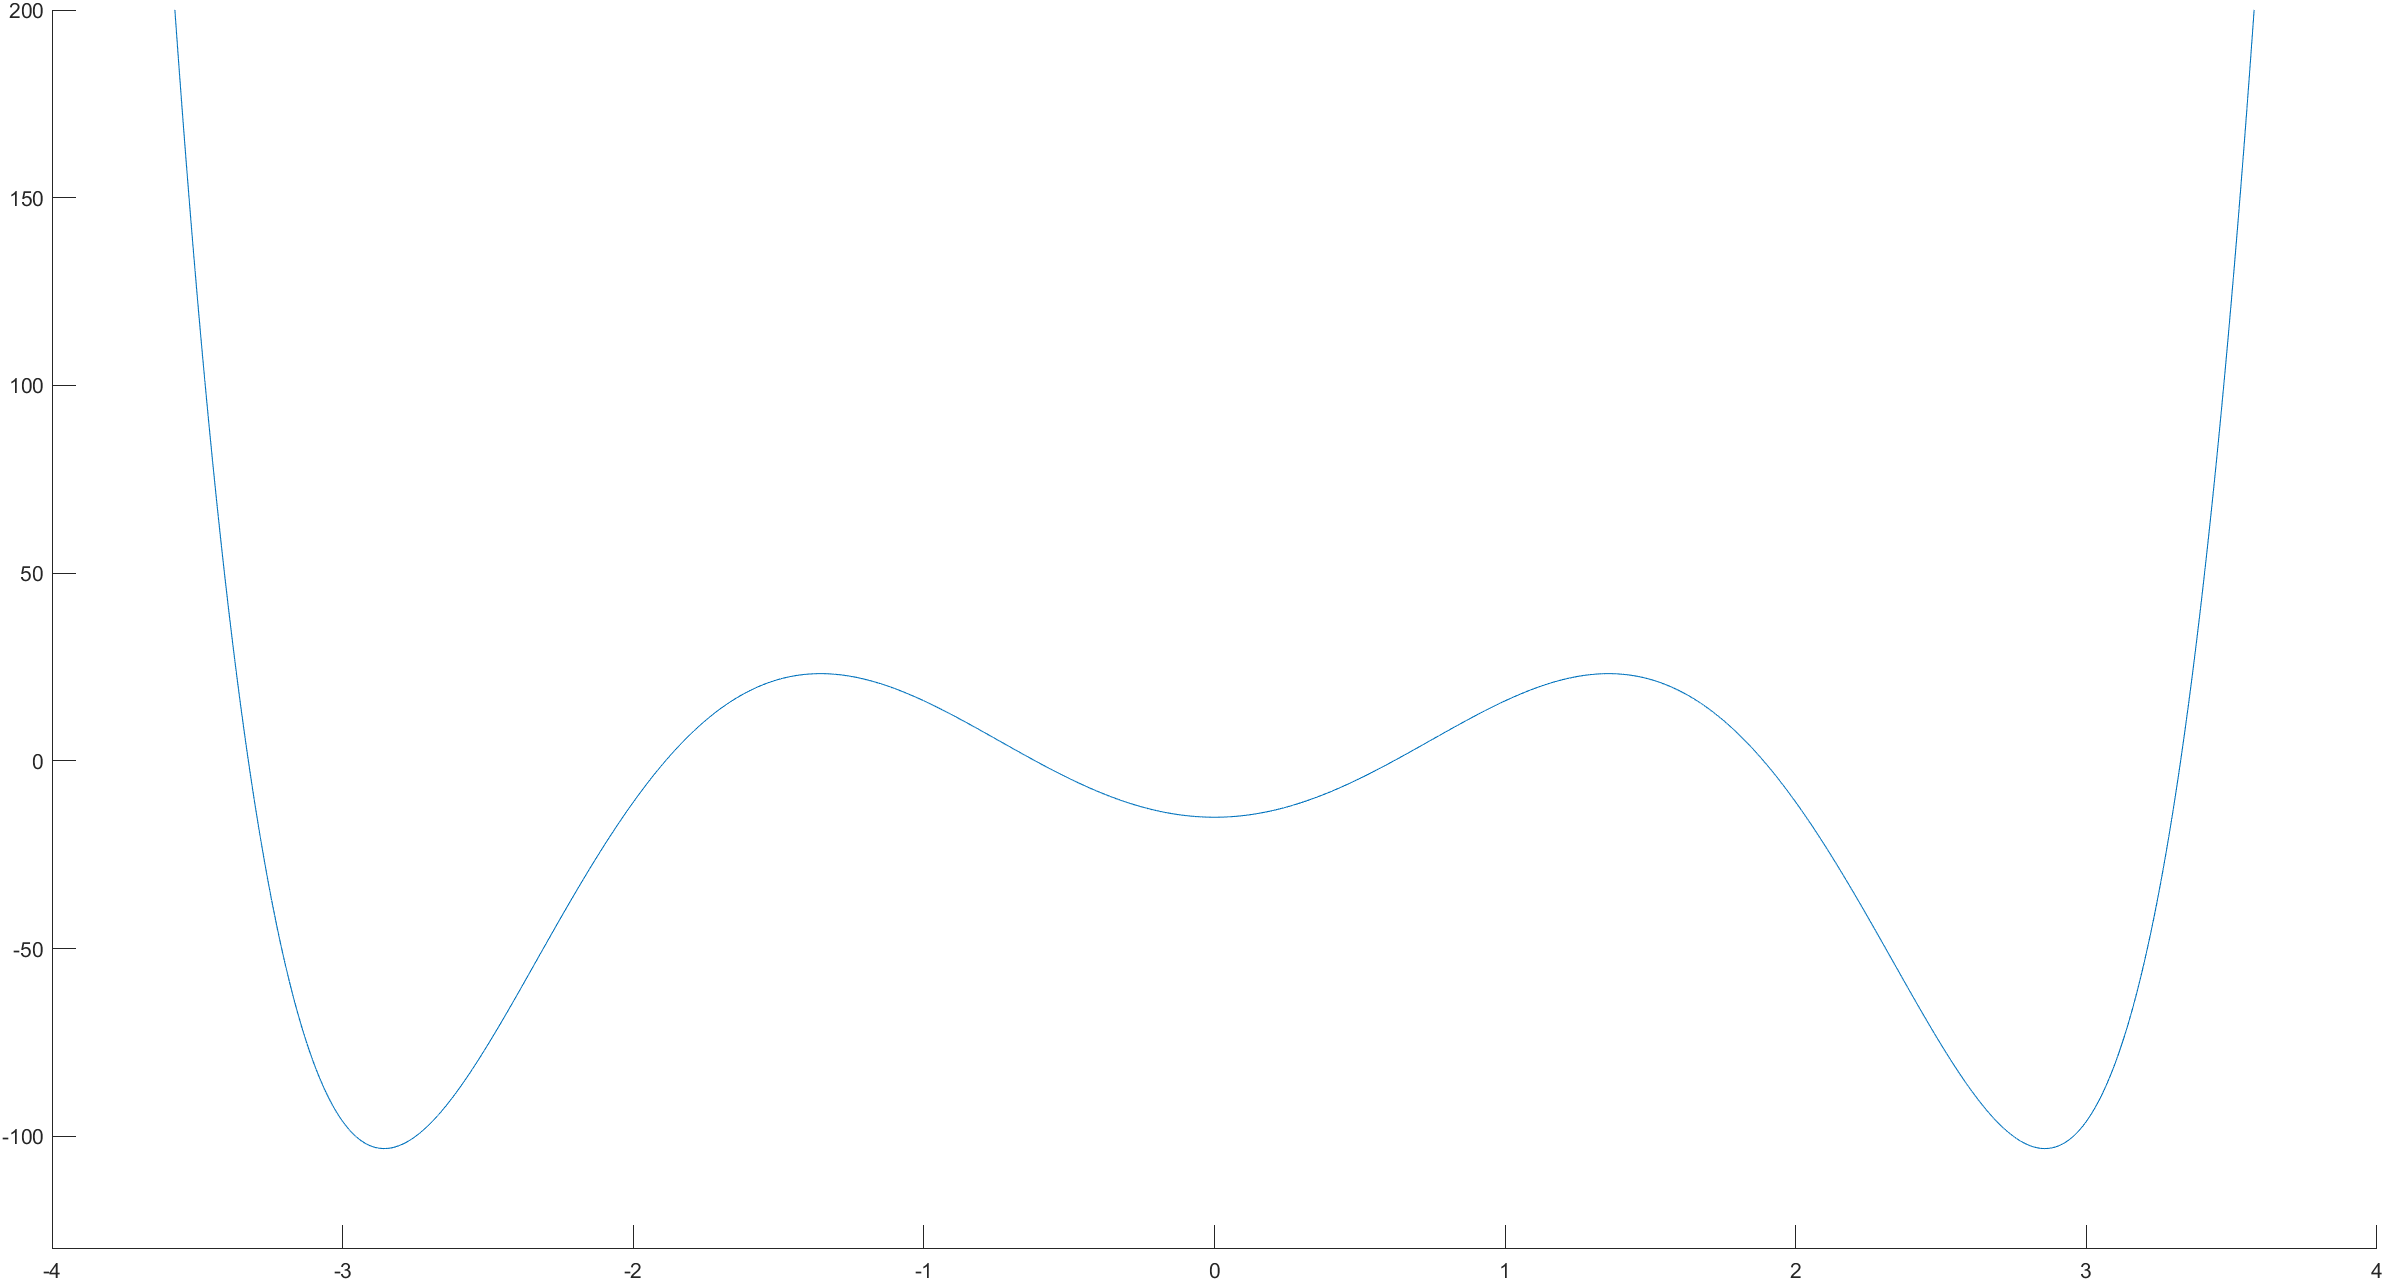
</p>  
Функция имеет 3 точки минимума  
Будем рассматривать промежуток $[-3.5,3.5]$  и точность $ϵ = 0.01$  

In [665]:
# define function

def multimodalFunction(x):
    return x ** 6 - 15 * x ** 4 + 45 * x ** 2 - 15

leftBorder = -3.5
rightBorder = 3.5

accuracy = 0.1

# compute minimums
dichotomyRes = dichotomy(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
goldenRatioRes = goldenRatio(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
fibonacciRes = fibonacci(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
parabolaRes = parabola(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
brentRes = brent(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)

In [666]:
# create table with x, y, iterations and calculations
methods = {"name": [dichotomyRes[0], goldenRatioRes[0], fibonacciRes[0], parabolaRes[0], brentRes[0]],
           "x": [dichotomyRes[1], goldenRatioRes[1], fibonacciRes[1], parabolaRes[1], brentRes[1]],
           "fx": [dichotomyRes[2], goldenRatioRes[2], fibonacciRes[2], parabolaRes[2], brentRes[2]],
           "iterations": [dichotomyRes[3], goldenRatioRes[3], fibonacciRes[3], parabolaRes[3], brentRes[3]],
           "calculations": [dichotomyRes[4], goldenRatioRes[4], fibonacciRes[4], parabolaRes[4], brentRes[4]]}

methodsFrame = DataFrame(methods, columns = ["x", "fx", "iterations", "calculations"],
                                    index = methods["name"])
methodsFrame

,x,fx,iterations,calculations
Dichotomy,0.000000e+00,-15.00000,1,3
Golden ratio,1.387779e-16,-15.00000,5,10
Fibonacci,2.831461e+00,-103.04885,10,12
Parabola,0.000000e+00,-15.00000,1,4
Brent,0.000000e+00,-15.00000,11,12


Все методы нашли точку минимума на данной функции  
Стоит отметить, что метод Фибоначчи нашел глобальный минимум функции

Рассмотрим другой полином $f(x) = x^7-8x^5-6x^3+15x-3$  
<p align="center">
  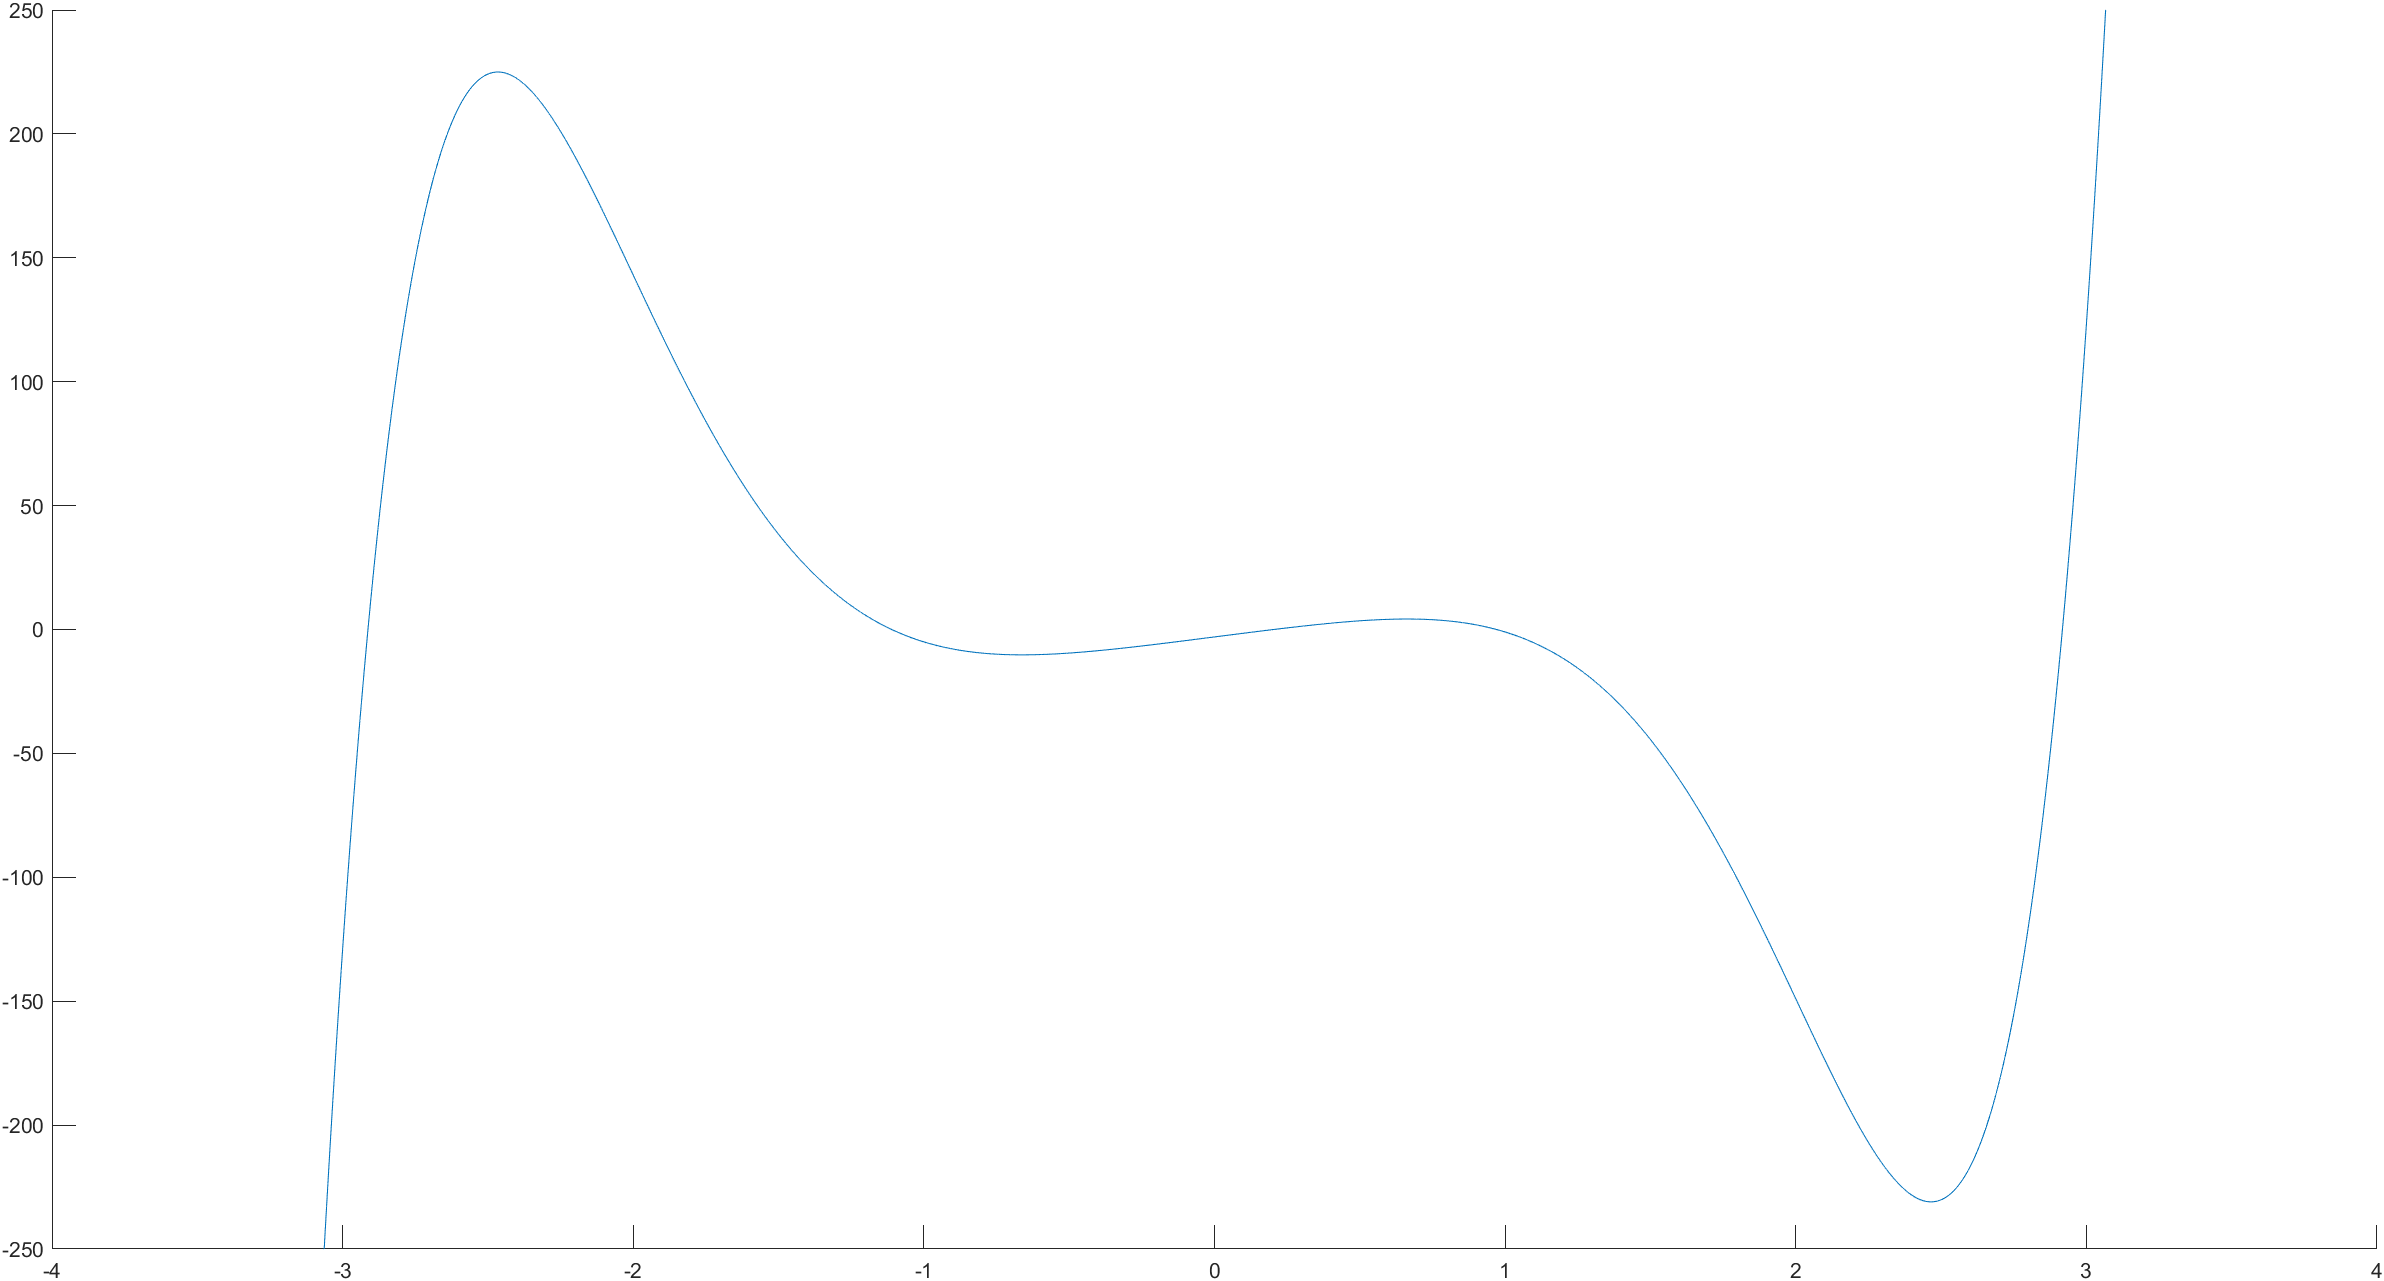
</p>
Функция имеет 2 точки минимума  
Рассмотрим на промежутке $[-6, 5]$ с точкностью $ϵ=0.01$

In [667]:
# define function

def multimodalFunction(x):
    return x ** 7 - 8 * x ** 5 - 6 * x ** 3 + 15 * x - 3

leftBorder = -6
rightBorder = 5

accuracy = 0.01

# compute minimums
dichotomyRes = dichotomy(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
goldenRatioRes = goldenRatio(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
fibonacciRes = fibonacci(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
parabolaRes = parabola(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)
brentRes = brent(leftBorder = leftBorder, rightBorder = rightBorder, accuracy = accuracy, function = multimodalFunction)

In [668]:
# create table with x, y, iterations and calculations
methods = {"name": [dichotomyRes[0], goldenRatioRes[0], fibonacciRes[0], parabolaRes[0], brentRes[0]],
           "x": [dichotomyRes[1], goldenRatioRes[1], fibonacciRes[1], parabolaRes[1], brentRes[1]],
           "fx": [dichotomyRes[2], goldenRatioRes[2], fibonacciRes[2], parabolaRes[2], brentRes[2]],
           "iterations": [dichotomyRes[3], goldenRatioRes[3], fibonacciRes[3], parabolaRes[3], brentRes[3]],
           "calculations": [dichotomyRes[4], goldenRatioRes[4], fibonacciRes[4], parabolaRes[4], brentRes[4]]}

methodsFrame = DataFrame(methods, columns = ["x", "fx", "iterations", "calculations"],
                                    index = methods["name"])
methodsFrame

,x,fx,iterations,calculations
Dichotomy,-5.995158,-215201.153897,12,25
Golden ratio,2.467544,-230.971093,15,18
Fibonacci,2.461803,-230.963855,16,18
Parabola,2.396230,-228.005049,23,26
Brent,2.465254,-230.973486,15,16


На данной функции все методы, за исключением дихотомии, нашли минимум (глобальный) функции

#### Вывод
Метод дихотомии может не найти минимум функции, если например на 1 итерации окрестность минимума будет находится правее точке $x_1, x_2$ и окажется, что $f(x_1)<f(x_2)$  
Аналогичная ситуация могут приключиться с остальными методами одномерный оптимизации  
Поэтому их стоит использовать только на непрерывных, унимодальных функциях